In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
Q12 = drive.CreateFile({'id':'1tLZW5KLjlUodE2MQLVDzpdx7VKLqM72N'}) 
Q12.GetContentFile('sales_Q12_2019.csv') 
Q34 = drive.CreateFile({'id':'1wSB_aLXsLvKeLbF_pWdQDrycp6Q78tcJ'}) 
Q34.GetContentFile('sales_Q34_2019.csv') 

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_sales = pd.read_csv("sales_Q12_2019.csv")
print(df_sales.shape)
df_sales.head()

(5837, 76)


,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP,dealer_state,date
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44610,California,2019-04-28
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41505,California,2019-03-14
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58890,California,2019-06-12
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51055,California,2019-03-04
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70830,California,2019-01-23


In [ ]:
df_sales = df_sales.drop(columns=['dealer_state','date'])
df_sales.head(20)

,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44610
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41505
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58890
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51055
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70830
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72330
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76480
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56705
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57090
9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59205


In [ ]:
df_sales.columns

Index(['main_S60_1', 'main_S60_2', 'main_type_SP100D', 'main_type_S60D_1',
       'main_type_S60D_2', 'main_type_S70', 'main_type_S70D', 'main_type_S75',
       'main_type_S75D', 'main_type_S80', 'main_type_S80D', 'main_type_S85',
       'main_type_S85P', 'main_type_P85D', 'main_type_S90', 'main_type_S90D',
       'main_type_S100D', 'engine_A', 'engine_B', 'engine_C', 'engine_D',
       'engine_E', 'engine_F', 'engine_G', 'engine_H', 'engine_I', 'engine_J',
       'engine_K', 'engine_L', 'engine_M', 'engine_N', 'engine_O', 'engine_P',
       'engine_Q', 'engine_R', 'engine_S', 'engine_T', 'engine_U', 'engine_V',
       'engine_W', 'engine_X', 'engine_Y', 'engine_Z', 'sales_1', 'sales_2',
       'sales_3', 'sales_4', 'sales_5', 'sales_6', 'sales_7', 'sales_8',
       'sales_9', 'sales_10', 'sales_11', 'sales_12', 'sales_13', 'sales_14',
       'sales_15', 'sales_16', 'sales_17', 'sales_18', 'sales_19', 'sales_20',
       'sales_21', 'sales_22', 'sales_23', 'sales_24', 'sales_25', 'sales

### Read in the CSV file containing the California sales data for Quarters 3 and 4

The `'dealer_state'` and `'date'` columns have already been eliminated in this dataset, so you don't need to worry about them here. Examine the data's shape and first few rows.

In [ ]:
# Read in the Q34 data
df_pred = pd.read_csv("sales_Q34_2019.csv")
print(df_pred.shape)
df_pred.head(3)

(6666, 74)


,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,51355
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71580
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66790


In [ ]:
df_pred

,main_S60_1,main_S60_2,main_type_SP100D,main_type_S60D_1,main_type_S60D_2,main_type_S70,main_type_S70D,main_type_S75,main_type_S75D,main_type_S80,main_type_S80D,main_type_S85,main_type_S85P,main_type_P85D,main_type_S90,main_type_S90D,main_type_S100D,engine_A,engine_B,engine_C,engine_D,engine_E,engine_F,engine_G,engine_H,engine_I,engine_J,engine_K,engine_L,engine_M,engine_N,engine_O,engine_P,engine_Q,engine_R,engine_S,engine_T,engine_U,engine_V,engine_W,engine_X,engine_Y,engine_Z,sales_1,sales_2,sales_3,sales_4,sales_5,sales_6,sales_7,sales_8,sales_9,sales_10,sales_11,sales_12,sales_13,sales_14,sales_15,sales_16,sales_17,sales_18,sales_19,sales_20,sales_21,sales_22,sales_23,sales_24,sales_25,sales_26,sales_27,sales_28,sales_29,sales_30,MSRP
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,51355
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71580
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66790
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72330
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42725
6662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42465
6663,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59570
6664,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63820


In [ ]:
data = df_pred.drop(columns='MSRP')

    

In [ ]:
data.astype(str).agg(''.join, axis=1)

0       0000010000000000000000000000000001000000000000...
1       0000000000000100000000000000000001000000000000...
2       0000000000000100000000000000000001000000000000...
3       0000000000000100000000000000000001000000000000...
4       0000000000001000000000000000000001000000000100...
                              ...                        
6661    0000000000000000100000000000000000000100000000...
6662    0000000000000000110000000000000000000000000000...
6663    0000000000001000000000000000000001000000000100...
6664    0000000000001000000000000000000001000000000000...
6665    0000000000000100000000000000000001000000000000...
Length: 6666, dtype: object

In [ ]:
bY = np.array(data.value_counts(sort=False, normalize=True))[:, np.newaxis] 

In [ ]:
bY.shape

(71, 1)

In [ ]:
aY=np.array(data.value_counts(sort=False, normalize= True))

In [ ]:
aY.reshape(-1,1).shape

(71, 1)

In [ ]:
# def get_features_and_targets(df): #modified
#   # first drop MSRP column
#   data = df.drop(columns=['MSRP'])
#   col_names = list(data.columns)
#   # get count of sales with unique car type
#   sales_uniq_cnts = data.value_counts(sort=False, normalize=True)
#   # create dictionary with unique car type and sales count
#   sales_dict = dict(zip(sales_uniq_cnts.keys().tolist(), sales_uniq_cnts.tolist())) 
#   # drop duplicates 
#   sales_w_msrp = df.drop_duplicates(subset=col_names)
#   # create dictionary with unique car type and MSRP
#   sales_wo_msrp = sales_w_msrp.drop(columns=['MSRP'])
#   # use min-max normalization to scale msrp value to be in between 0 & 1
#   sales_msrp = ((sales_w_msrp['MSRP'] - min(sales_w_msrp['MSRP']))/(max(sales_w_msrp['MSRP']) - min(sales_w_msrp['MSRP']))).tolist()
#   sales_wo_msrp_keys = sales_wo_msrp.value_counts(sort=False).keys().tolist()
#   sales_msrp_dict = dict(zip(sales_wo_msrp_keys, sales_msrp)) 
#   # finally using above 2 dictionaries create final data
#   final_data = [(*key, sales_msrp_dict[key], sales_dict[key]) for key in sales_wo_msrp_keys]
#   final_data = pd.DataFrame(final_data, columns=[*sales_wo_msrp.columns.tolist(), 'MSRP', 'number_of_sales'])
#   # target/dependent varaible
#   y = np.array(final_data['number_of_sales']).reshape(-1,1)
#   # features/independent variables
#   X = np.array(final_data.drop(columns=['number_of_sales']))
#   return X, y

In [ ]:
data = df_sales.drop(columns=['MSRP'])
col_names = list(data.columns)
len(col_names)

73

Note, the solution above does a sorting mechanism that does not align well the feature values with the labels; so we will use the solution we all agreed on n class with the modification that I will normalize it as in the previous solution

In [ ]:
# More optimized solution
def get_features_and_targets(df):
    data = df.drop(columns=['MSRP'])
    # df['Count'] = df.groupby(data.columns.tolist())['MSRP'].transform('count')
    df['Norm_Count'] = df.groupby(data.columns.tolist())['MSRP'].transform('count')#lambda x: (x-min(X[:,-1]))/np.ptp(X[:,-1]))
    df = df.drop_duplicates(subset=data.columns.tolist())
    X=np.array(df.iloc[:,:-1])#all but the last
    #This function was not normalizing the data
    # X[:,-1] = ( X[:,-1] - min(X[:,-1]) ) / np.ptp(X[:,-1])
    X[:,-1]=np.apply_along_axis(lambda x :( x -m)/r, 0, (x[:,-1]).astype('float'))
    Y = np.array(df['Norm_Count']).reshape(-1,1)
    # Y = np.array(df['Norm_Count'])[:, np.newaxis]
    return X, Y

In [ ]:
# df_sales.groupby(data.columns.tolist())['MSRP'].transform('count')
# x=np.array(df_sales.iloc[:,:-1])
# # X[:,-1] = np.apply_along_axis(lambda x: (x-min(X[:,-1]))/np.ptp(X[:,-1]), 0,X[:,-1] ) 
# np.isnan( x[:,-1] ).sum()
# np.ptp(x[:,-1])
# m=min(x[:,-1])
# r=np.ptp(x[:,-1])
# a=(x[:,-1] - min(x[:,-1]) ) / np.ptp(x[:,-1]).reshape(-1,1)
# x[:,-1]=np.apply_along_axis(lambda x :( x -m)/r, 0, (x[:,-1]).astype('float'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [ ]:
# Extract training features and targets from the Q12 data
train_X, train_Y =  get_features_and_targets(df_sales)
# Extract test features and targets from the Q34 data
test_X, test_Y = get_features_and_targets(df_pred)
print(f"Number of unique cars in Q12 = {len(train_Y)}")
print(f"Number of unique cars in Q34 = {len(test_Y)}")

Number of unique cars in Q12 = 66
Number of unique cars in Q34 = 71


### Extract features and targets as defined above from both the Q12 and Q34 datasets

In [ ]:
# Extract training features and targets from the Q12 data
train_X, train_Y =  get_features_and_targets(df_sales)
# Extract test features and targets from the Q34 data
test_X, test_Y = get_features_and_targets(df_pred)
print(f"Number of unique cars in Q12 = {len(train_Y)}")
print(f"Number of unique cars in Q34 = {len(test_Y)}")

Number of unique cars in Q12 = 66
Number of unique cars in Q34 = 71


You probably noticed that the Q12 and Q34 datasets contained differing numbers of distinct cars. Clearly, some new models were introduced by Q3, but were any discontinued by the end of Q2? Let's find out.

In [ ]:
# unique cars in 2012 (Q1:Q4)
# Concatenate the Q12 and Q34 DataFrames into a single DataFrame
df_full = pd.concat([df_sales, df_pred])
# Extract features and targets from the concatenated Q14 data
data_X, data_Y = get_features_and_targets(df_full)

print(f"Number of unique cars in Q12 and Q34 = {len(data_Y)}")

Number of unique cars in Q12 and Q34 = 80


set theory,  https://www.youtube.com/watch?v=B1v9OeCTlu0.

The following set theory equations are true for any two events $A$ and $B$:

$$(A \cup B) = (A) + (B) -  (A \cap B)$$
$$(A \cap B) = (A) + (B) -  (A \cup B)$$
$$(A) =  (A \cap B) +  (A \cap B^c)$$



In [ ]:
#models_q12_or34 refers to (A Union B), models_q14 refers to (A intersection B)
# models_q12_or_q34 = len(data_Y) #the full set
models_q12_or_q34 = len(data_Y)
models_q12 = len(train_Y) 
models_q34 = len(test_Y) 

models_q14 = models_q12 + models_q34 - models_q12_or_q34 #(A intersection B)
discontinued = models_q12 - models_q14
launched = models_q34 - models_q14

print(f"{models_q14} models were sold throughout 2019")
print(f"{discontinued} models were discontinued by the second half of 2019")
print(f"{launched} models were launched in the second half of 2019")


57 models were sold throughout 2019
9 models were discontinued by the second half of 2019
14 models were launched in the second half of 2019


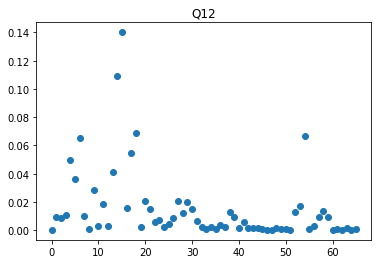

In [ ]:
# Visualize the training targets
plt.scatter(range(len(train_Y)), train_Y)
plt.title("Q12")
plt.show()


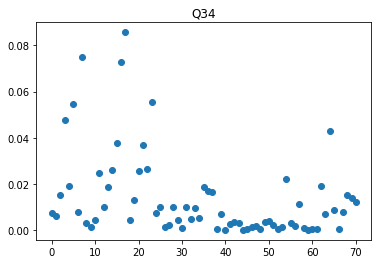

In [ ]:
# Visualize the test targets
plt.scatter(range(len(test_Y)), test_Y)
plt.title("Q34")
plt.show()


In [ ]:
# Initialize learned parameters theta and hyperparameters
s_theta = np.zeros((train_X.shape[1]+1, 1))
s_learning_rate = 0.001
s_max_iteration = 1000

In [ ]:
# Define your hypothesis function according to the instructions above
def h (theta, X) :
    #X is 71x73 matrix
    #Y is 71X1, we need or theta to be 73x1 but we are adding a bias term to both theta and X
    tempX = np.ones((X.shape[0],X.shape[1]+1))
    tempX[:,1:] =X
    return tempX @theta


In [ ]:
# Loss Function
def loss (theta, X, Y) :
    ### START CODE HERE ###
    return np.mean(np.square(Y-h(theta,X)))/2
    ### END CODE HERE ###

In [ ]:
def gradient (theta, X, Y) :
    ### START CODE HERE ###
    # Create a temporary X array with an added 0th bias column
    tempX = np.ones((X.shape[0], X.shape[1] + 1))
    tempX[:,1:] = X
    # Compute the gradient according to the instructions above
    d_theta = -np.dot( tempX.transpose() ,(Y-h(theta,X)))/len(Y)
    ### END CODE HERE ###
    return d_theta

In [ ]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
    ### START CODE HERE ###
    # Initialize the cost as an array of zeros, one for each iteration through the dataset
    cost = np.zeros(max_iteration)
    # Loop over the dataset
    for i in range(max_iteration) : #(epochs)
        # Loop over each row in the dataset
        for j in range(X.shape[0]): #iterate over the rows (values)
            # Compute the gradient from the current row in X and the associated Y value
            # Make sure that both X and Y are represented as 2D row vectors
            d_theta =gradient (theta, X[j,:].reshape(1, -1), Y[j,:])
            # Update theta
            theta = theta - learning_rate * d_theta
        # Update the cost array for the current iteration
        cost[i] = loss(theta, X, Y)
    ### END CODE HERE ###
        if i % gap == 0 :
            print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
    return theta, cost

In [ ]:
s_theta, s_cost = stochastic_gradient_descent(s_theta, train_X, train_Y, s_learning_rate, s_max_iteration, 100)

iteration :  0  loss :  0.0004191735806828931
iteration :  100  loss :  0.00021190592770110398
iteration :  200  loss :  0.00017714376679245578
iteration :  300  loss :  0.00016190085262977058
iteration :  400  loss :  0.00015382460302290957
iteration :  500  loss :  0.00014903423336439244
iteration :  600  loss :  0.00014594567512446783
iteration :  700  loss :  0.0001438069783000123
iteration :  800  loss :  0.0001422287000728589
iteration :  900  loss :  0.00014099763046731447


### Generate Predictions from Test Data

In [ ]:
GD_P =  h(s_theta,test_X)
# Set any negative predictions to 0
GD_P[GD_P<0] = 0

### Visualize the predicted and actual test labels

RMSE, R2 using SGD= 0.011433110693258206 0.8311104437154136


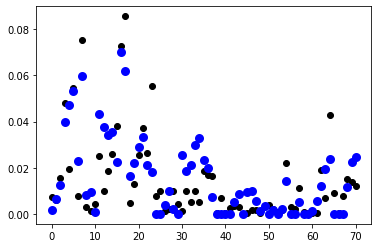

In [ ]:
plt.scatter(range(len(test_Y)), test_Y,  color='black')
plt.scatter(range(len(GD_P)), GD_P, color='blue', linewidth=3)
from sklearn.metrics import mean_squared_error as MSE

# This function evaluates the R**2 statistic
# Source: https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
def r2(Yt,Yp):
    yhat = Yp                         
    ybar = np.sum(Yt)/len(Yt)          
    ssreg = np.sum((yhat-ybar)**2)   
    sstot = np.sum((Yt - ybar)**2)    
    results = ssreg / sstot
    return results


print("RMSE, R2 using SGD=", np.sqrt(MSE(test_Y,GD_P)), r2(test_Y,GD_P))
gdmse=np.sqrt(MSE(test_Y,GD_P))
# gdr2=r2(test_Y,GD_P)
from sklearn.metrics import r2_score
gdr2=r2_score(test_Y,GD_P)



Since our training dataset isn't very large, let's generate predictions using the normal equations: 

$$W = (X^T \cdot X)^{-1} \cdot X^T \cdot Y$$ 
$$\hat{Y} = X \cdot W$$

and see how they compare to the predictions which we obtained from gradient descent.
Ensure $$Y=[nx1], W=[dx1], X[nxd]$$ dimensions, respectively.

In [ ]:
# Compute the inverse of the matrix product of the transpose of X and X
tempX = np.ones((train_X.shape[0], train_X.shape[1]+1)) #71x75
tempX[:,1:] = train_X
inv1 = np.linalg.pinv(tempX.T @ tempX)
W1 = inv1 @ (tempX.T@train_Y)
tempXt = np.ones((test_X.shape[0], test_X.shape[1]+1)) #71x75
tempXt[:,1:] = test_X
PN1 = (W1.T @tempXt.T).T  #we use the test, to get the prediction


In [ ]:

PN1[np.where(PN1<0)]=0

RMSE, R2 for prediction all features = 0.012551753469252644 0.9036059214592809


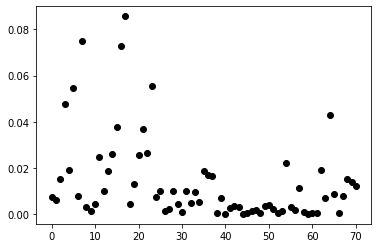

In [ ]:
# Plot outputs
plt.scatter(range(len(test_Y)), test_Y,  color='black')
# plt.scatter(range(len(PN1)), PN1, color='blue', linewidth=3)
print("RMSE, R2 for prediction all features =", np.sqrt(MSE(test_Y,PN1)), r2(test_Y,PN1)) #[Low error high corr]
neqMSE=np.sqrt(MSE(test_Y,PN1))
neqr2= r2_score(test_Y,PN1)#r2(test_Y,PN1)



### Regularized Normal Equations

In [ ]:
print('Recall that our training features array train_X has')
print(f'm = {train_X.shape[0]} rows and n = {train_X.shape[1]} columns')

Recall that our training features array train_X has
m = 66 rows and n = 74 columns


`train_X` is thus wider than it is tall, which suggests that the regularized normal equations might perform better in generating label predictions. In this case, we modify the first of the normal equations given above to 

$$W = (X^T \cdot X + \lambda m I)^{-1} \cdot X^T \cdot Y$$.

Here, $\lambda$ is the regularization parameter and $m$ is the number of rows in $X$.

In [ ]:
tempX.shape

(66, 75)

In [ ]:
train_Y.shape

(66, 1)

In [ ]:
train_X.shape

(66, 74)

In [ ]:

lam= [0.1,0.03,0.3, 0.01, 0.001,0.005,0.5,1,0.2]

for l in lam:
  inv2 = np.linalg.pinv((tempX.T @ tempX) + l*tempX.shape[0]*np.identity(tempX.shape[1]))
  # Compute W using the first of the Normal Equations
  W2 = inv2 @ (tempX.T @ train_Y)
  # Compute the predicted Y values using the second of the Normal Equations
  PN2 = (W2.T @tempXt.T).T  #we use the test, to get the prediction


  print("RMSE, R2 for prediction all features =", np.sqrt(MSE(test_Y,PN2)), r2(test_Y,PN2), "lambda: ", l) #[Low error high corr]

RMSE, R2 for prediction all features = 0.01359632395900825 0.23755939351852465 lambda:  0.1
RMSE, R2 for prediction all features = 0.012174660147701188 0.5545070212966686 lambda:  0.03
RMSE, R2 for prediction all features = 0.015808698319604027 0.06843925876569179 lambda:  0.3
RMSE, R2 for prediction all features = 0.012209874794576409 0.8253043315629452 lambda:  0.01
RMSE, R2 for prediction all features = 0.014174172153244098 1.1926374193089835 lambda:  0.001
RMSE, R2 for prediction all features = 0.012613328476266401 0.9561452927941159 lambda:  0.005
RMSE, R2 for prediction all features = 0.0167946908385585 0.042414664148698225 lambda:  0.5
RMSE, R2 for prediction all features = 0.01805400272870509 0.060463666000026554 lambda:  1
RMSE, R2 for prediction all features = 0.014978748174141446 0.11280728522492482 lambda:  0.2


We will keep the hyper parameter with the lowest RMSE,
 lambda = 0.01

In [ ]:
  l = 0.01
  inv2 = np.linalg.pinv((train_X.T @ train_X) + l*train_X.shape[0]*np.identity(train_X.shape[1]))
  # Compute W using the first of the Normal Equations
  W2 = inv2 @ (train_X.T @ train_Y)
  # Compute the predicted Y values using the second of the Normal Equations
  PN2 = (W2.T @test_X.T).T  #we use the test, to get the prediction
  rneqMSE=np.sqrt(MSE(test_Y,PN2))
  rneqr2=r2_score(test_Y,PN2)#r2(test_Y,PN2)
  print("RMSE, R2 for prediction all features =", np.sqrt(MSE(test_Y,PN2)), r2(test_Y,PN2), "lambda: ", l) #[Low error high corr]

RMSE, R2 for prediction all features = 0.012315834971475075 0.819497895186248 lambda:  0.01


RMSE, R2 for prediction all features = 0.012551753469252644 0.9036059214592809


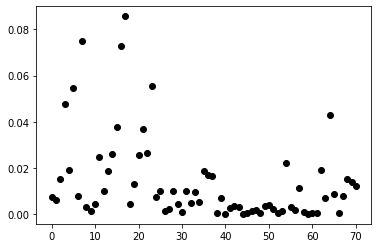

In [ ]:
# Plot outputs
plt.scatter(range(len(test_Y)), test_Y,  color='black')
# plt.scatter(range(len(PN1)), PN1, color='blue', linewidth=3)
print("RMSE, R2 for prediction all features =", np.sqrt(MSE(test_Y,PN1)), r2(test_Y,PN1)) #[Low error high corr]

Non-linear Regression Models (GLM, DT) 

In [ ]:
# GLM 
import statsmodels.api as sm

# Instantiate the GLM
glm_gauss = sm.GLM(train_Y, tempX, family=sm.families.Gaussian())
# Train the GLM
glm_results = glm_gauss.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   66
Model:                            GLM   Df Residuals:                       34
Model Family:                Gaussian   Df Model:                           31
Link Function:               identity   Scale:                      0.00049191
Method:                          IRLS   Log-Likelihood:                 179.61
Date:                Sun, 30 May 2021   Deviance:                     0.016725
Time:                        15:42:51   Pearson chi2:                   0.0167
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0253      0.011      2.283      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
glm_results.pvalues.size

75

In [ ]:
train_Y.size

66

In [ ]:

np.where([glm_results.pvalues<0.10])[1]

array([ 0,  1,  6,  8, 13, 15, 17, 18, 43, 53, 54])

### Generate predictions from the test data

In [ ]:
G_P2 = glm_results.predict(tempXt)
# Set any negative predictions to 0
G_P2[G_P2<0]=0

RMSE, R2 for GLM= 0.012551753469252656 0.9036059214592788


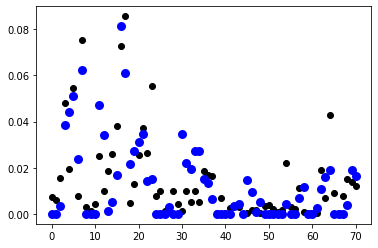

In [ ]:
# Plot outputs
plt.scatter(range(len(test_Y)), test_Y,  color='black')
plt.scatter(range(len(G_P2)), G_P2, color='blue', linewidth=3)
print("RMSE, R2 for GLM=", np.sqrt(MSE(test_Y,G_P2)), r2(test_Y,G_P2)) 
glmmse = np.sqrt(MSE(test_Y,G_P2))
glmr2 = r2_score(test_Y,G_P2)  #r2(test_Y,G_P2)

In [ ]:
glm_gamm = sm.GLM(train_Y, tempX, family=sm.families.Gamma())
# Train the GLM
glm_gamm_results = glm_gamm.fit()
### END CODE HERE ###
print(glm_gamm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   66
Model:                            GLM   Df Residuals:                       34
Model Family:                   Gamma   Df Model:                           31
Link Function:          inverse_power   Scale:                         0.49439
Method:                          IRLS   Log-Likelihood:                 299.97
Date:                Sun, 30 May 2021   Deviance:                       18.767
Time:                        15:42:52   Pearson chi2:                     16.8
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2164.9539    894.764      2.420      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
G_P3 = glm_gamm_results.predict(tempXt)
# Set any negative predictions to 0
G_P3[G_P3<0]=0

RMSE, R2 for GLM= 0.03756876334715153 6.274285539286866


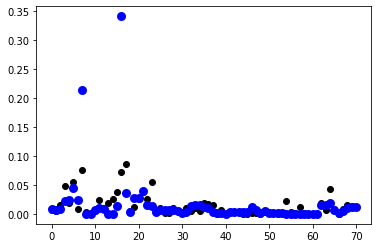

In [ ]:
plt.scatter(range(len(test_Y)), test_Y,  color='black')
plt.scatter(range(len(G_P3)), G_P3, color='blue', linewidth=3)
print("RMSE, R2 for GLM=", np.sqrt(MSE(test_Y,G_P3)), r2(test_Y,G_P3)) 
glmmse_gamm = np.sqrt(MSE(test_Y,G_P3))
glmr2_gamm=  r2_score(test_Y,G_P3)#r2(test_Y,G_P3)

### Random Forest Regression
The relevant parameters are the `max_depth` of the trees 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(train_X, train_Y)
pred_rf = regr.predict(test_X)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# Set any negative predictions to 0
pred_rf[np.where(pred_rf<0)]=0

RMSE, R2 for Decision Trees= 0.00011819078794679564 0.8747022381089109


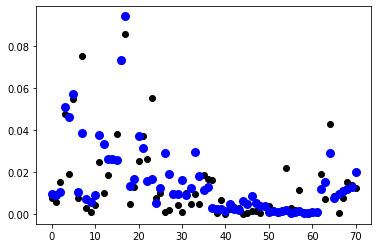

In [ ]:
# Plot outputs
plt.scatter(range(len(test_Y)), test_Y,  color='black')
plt.scatter(range(len(pred_rf)), pred_rf, color='blue', linewidth=3)
print("RMSE, R2 for Decision Trees=", MSE(test_Y,pred_rf), r2(test_Y,pred_rf)) #[Low error high corr]
rfmse=np.sqrt(MSE(test_Y,pred_rf))
rfr2= r2_score(test_Y,pred_rf)##r2(test_Y,pred_rf)

In [ ]:
test_Y.shape

(71, 1)

## Results
---------------------------------------------------------------------------

-------------------------------------------------------------------------------

In [ ]:

from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Method", "RMSE", "R2", 'Comment']) 



# Add rows 
myTable.add_row(["Gradient Descent", round(gdmse,5), round(gdr2,3),""]) 
myTable.add_row(["Normal Equations", round(neqMSE,5), round(neqr2,3),""]) 
myTable.add_row(["Regularized Normal Equations", round(rneqMSE,5), round(rneqr2,3), ""]) 
myTable.add_row(["GLM_Gauss", round(glmmse,5), round(glmr2,3),"with Gaussian residuals"])
myTable.add_row(["GLM_Gamm", round(glmmse_gamm,5), round(glmr2_gamm,3),"with Gamma residuals"]) 
myTable.add_row(["Decision Trees", round(rfmse,5), round(rfr2,3),"easy to use; used default parameters, peformed best"]) 
  
print(myTable)

+------------------------------+---------+--------+-----------------------------------------------------+
|            Method            |   RMSE  |   R2   |                       Comment                       |
+------------------------------+---------+--------+-----------------------------------------------------+
|       Gradient Descent       | 0.01143 | 0.623  |                                                     |
|       Normal Equations       | 0.01255 | 0.546  |                                                     |
| Regularized Normal Equations | 0.01232 | 0.563  |                                                     |
|          GLM_Gauss           | 0.01255 | 0.546  |               with Gaussian residuals               |
|           GLM_Gamm           | 0.03757 | -3.069 |                 with Gamma residuals                |
|        Decision Trees        | 0.01087 | 0.659  | easy to use; used default parameters, peformed best |
+------------------------------+---------+----

Using Random forest , I will find the over and under predicted models. They are pretty close for under 100. Maybe there is not enough data on the less sold models, ie classes are not evenly distributed and the more sales will be of the cheapest models and they will have our best predictions. Also, there new car models that the training set did not have; so it is fair that it could not pick up on this to predict them.
137 unique models in  the combined data base.

Number of unique cars in Q12 = 66
Number of unique cars in Q34 = 71

There are some models that are "incomplete", they dont have all three features 


Text(0.5, 1.0, 'modified other get features and targets')

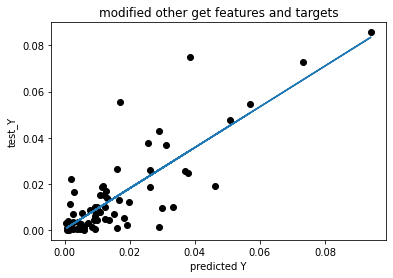

In [ ]:
plt.scatter(pred_rf, test_Y,  color='black')
m, b = np.polyfit(pred_rf, test_Y, 1)
plt.plot(pred_rf, m*pred_rf + b)
plt.xlabel("predicted Y")
plt.ylabel("test_Y")
plt.title("modified other get features and targets")

ETUDE OF THE VALUE COUNTS (changes order)

In [ ]:
a = np.array([[10,10,10], [2,2,2], [1,1,1], [1,1,1], [2,2,2], [10,10,10], [10,10,10]])
aDF = pd.DataFrame(a)
aDF.columns = ['A', 'B', 'C']
print(aDF)
print("\nValue Counts: \n")
print(aDF.value_counts(sort = False))
print("\nDropping duplicates: \n")
print(aDF.drop_duplicates(subset = ['A','B', 'C']))

    A   B   C
0  10  10  10
1   2   2   2
2   1   1   1
3   1   1   1
4   2   2   2
5  10  10  10
6  10  10  10

Value Counts: 

A   B   C 
1   1   1     2
2   2   2     2
10  10  10    3
dtype: int64

Dropping duplicates: 

    A   B   C
0  10  10  10
1   2   2   2
2   1   1   1


In [ ]:
aDF_counts=aDF.value_counts(sort = False)

In [ ]:
aDF_counts

A   B   C 
1   1   1     2
2   2   2     2
10  10  10    3
dtype: int64

In [ ]:
aDF_uniq = aDF.drop_duplicates(subset = ['A','B', 'C'])
aDF_uniq_keys=aDF_uniq.value_counts(sort = False).keys()

In [ ]:
aDF_uniq_keys


MultiIndex([( 1,  1,  1),
            ( 2,  2,  2),
            (10, 10, 10)],
           names=['A', 'B', 'C'])

In [ ]:
final= [(*key, aDF_dict[key]) for key in aDF_uniq_keys]

In [ ]:
final

[(1, 1, 1, 2), (2, 2, 2, 2), (10, 10, 10, 3)]

In [ ]:
np.max(np.abs(pred_rf-test_Y.reshape(-1,)))

0.03839790891886858

I will be picking 11 models, the top ones that predicted off (over or under predicted sales)

In [ ]:
indices=np.abs(pred_rf-test_Y.reshape(-1,)).argsort()[50:][::-1]
indices

array([23,  7, 26,  4, 12, 54, 33, 27, 30, 64, 37, 34, 11, 15, 20, 22, 57,
       66, 18, 17, 63])

In [ ]:
absolute_diff=np.sort(np.abs(pred_rf-test_Y.reshape(-1,)))[50:][::-1]
absolute_diff

array([0.03839791, 0.03657083, 0.02791701, 0.0268002 , 0.02342835,
       0.02035868, 0.02005321, 0.01695627, 0.01516056, 0.01400985,
       0.01333551, 0.01326709, 0.01293566, 0.01238878, 0.01153149,
       0.01044153, 0.00966013, 0.00903813, 0.008933  , 0.00844485,
       0.00828031])

In [ ]:
np.take(pred_rf, indices)

array([0.01695763, 0.03858668, 0.02911713, 0.04615213, 0.03332934,
       0.00184355, 0.02980418, 0.01905648, 0.01621067, 0.02904446,
       0.00301613, 0.0183676 , 0.03783815, 0.02556501, 0.03703404,
       0.01596111, 0.00174101, 0.00948818, 0.01358346, 0.09410342,
       0.01533101])

In [ ]:
# train_X[indices][:2]#these are 2 of the 21  models that performed the worst in the training set

In [ ]:
# len(train_X[indices])

In [ ]:
for model in test_X:
  if model not in train_X :
    print('ney')

These are the 11 models with the largest absolute value distance.
A lot of these models(7/11) did not have all three features, only had two. We can see that this is an issue and iswould be better for all models to have all 3 features.


In [ ]:
for i in range(len(train_X[indices])) :
  a=np.take(col_names,np.where(train_X[indices][i][:]==1)) #the [:] is added to correct dimension
  print(a)

We can see that engine_Q and sales 9  is one of the ones that performed worst, yet we have to check if there features are balanced or if most entries have engine_Q

In [ ]:
train_X.sum(axis=1) #it looks pretty evenly

In [ ]:
test_X.sum(axis=1)

As the best model for this multi-class clasification I choose random forest, it has the lowest rmse